In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148,72,35,0.0,33.6,0.627,50.0
1,1,85,66,29,0.0,26.6,0.351,31.0
2,8,183,64,0,0.0,23.3,0.672,32.0
3,1,89,66,23,94.0,28.1,0.167,21.0
4,0,137,40,35,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63.0
764,2,122,70,27,0.0,36.8,0.340,27.0
765,5,121,72,23,112.0,26.2,0.245,30.0
766,1,126,60,0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
float64		column 5	15
float64		column 6	6
float64		column 7	3
float64		column 8	24


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,768.000000,768.000000,768.000000,768.000000,753.000000,762.000000,765.000000,744.000000
mean,3.845052,120.894531,69.105469,20.536458,79.063745,31.982808,0.472421,33.221774
std,3.369578,31.972618,19.355807,15.952218,114.369100,7.903076,0.331802,11.777114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,25.000000,32.000000,0.371000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,126.000000,36.575000,0.627000,40.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

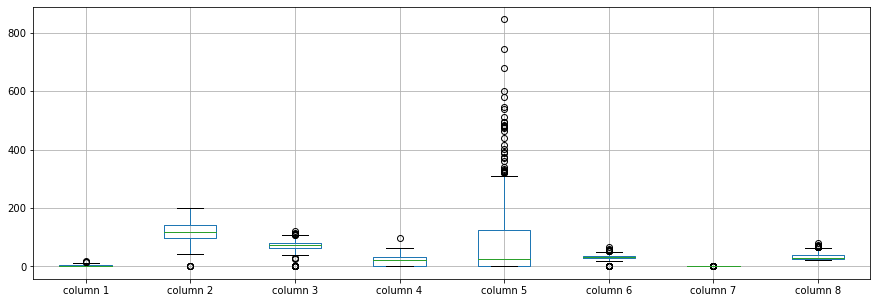

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.845052
column 2    120.894531
column 3     69.105469
column 4     20.536458
column 5     79.063745
column 6     31.982808
column 7      0.472421
column 8     33.221774
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.129459,0.141282,-0.081672,-0.077523,0.019904,-0.031940,0.541966
column 2,0.129459,1.000000,0.152590,0.057328,0.323679,0.221684,0.136502,0.265742
column 3,0.141282,0.152590,1.000000,0.207371,0.088967,0.279992,0.041907,0.237388
column 4,-0.081672,0.057328,0.207371,1.000000,0.435861,0.389957,0.182581,-0.116691
column 5,-0.077523,0.323679,0.088967,0.435861,1.000000,0.201581,0.203782,-0.055161
column 6,0.019904,0.221684,0.279992,0.389957,0.201581,1.000000,0.142762,0.038026
column 7,-0.031940,0.136502,0.041907,0.182581,0.203782,0.142762,1.000000,0.045018
column 8,0.541966,0.265742,0.237388,-0.116691,-0.055161,0.038026,0.045018,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+23,8+23+23,8+23+23+23,8+23+23+23+23,8+23+23+23+23+23,8+23+23+23+23,8+23+23+23,8+23+23,8+23,8], vae_layer = False, seed = 23)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 422.2084318796794
Epoch: 1 , loss: 421.84963035583496
Epoch: 2 , loss: 423.0123462677002
Epoch: 3 , loss: 421.7061996459961
Epoch: 4 , loss: 424.4983609517415
Epoch: 5 , loss: 421.69346046447754
Epoch: 6 , loss: 420.2799523671468
Epoch: 7 , loss: 418.3526967366536
Epoch: 8 , loss: 411.5620625813802
Epoch: 9 , loss: 406.5951150258382
Epoch: 10 , loss: 395.4875373840332
Epoch: 11 , loss: 389.17946656545
Epoch: 12 , loss: 378.07784271240234
Epoch: 13 , loss: 371.24913279215497
Epoch: 14 , loss: 365.05508613586426
Epoch: 15 , loss: 362.9009208679199
Epoch: 16 , loss: 352.0431474049886
Epoch: 17 , loss: 350.9651927947998
Epoch: 18 , loss: 337.1101296742757
Epoch: 19 , loss: 332.9065767923991
Epoch: 20 , loss: 340.5222695668538
Epoch: 21 , loss: 335.2532847722371
Epoch: 22 , loss: 338.7778180440267
Epoch: 23 , loss: 330.4591261545817
Epoch: 24 , loss: 337.81908321380615
Epoch: 25 , loss: 334.2356707255046
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    84.000000
column 4     0.000000
column 5     0.000000
column 6    35.400000
column 7     0.197597
column 8    16.255138
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0,0,0,0,0.0,0.0,0.0,0.0
1,0,0,0,0,0.0,0.0,0.0,0.0
2,0,0,0,0,0.0,0.0,0.0,0.0
3,0,0,0,0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0,0,0,0,0.0,0.0,0.0,0.0
764,0,0,0,0,0.0,0.0,0.0,0.0
765,0,0,0,0,0.0,0.0,0.0,0.0
766,0,0,0,0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(691.0109626774002, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.11962292764960873

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6,148,72,35,0.0,33.6,0.627,50.0
1,1,85,66,29,0.0,26.6,0.351,31.0
2,8,183,64,0,0.0,23.3,0.672,32.0
3,1,89,66,23,94.0,28.1,0.167,21.0
4,0,137,40,35,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63.0
764,2,122,70,27,0.0,36.8,0.340,27.0
765,5,121,72,23,112.0,26.2,0.245,30.0
766,1,126,60,0,0.0,30.1,0.349,47.0


In [20]:
imputations[-1].to_excel("PID_AL_1.xlsx", index=False, header=False)